In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")  # you can continue going on here, like cuda:1 cuda:2....etc. 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")
    

Running on the GPU


In [3]:
# MNIST Dataset
trainset = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

testset = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

batch_size = 100

train_dataloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset_dataloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)


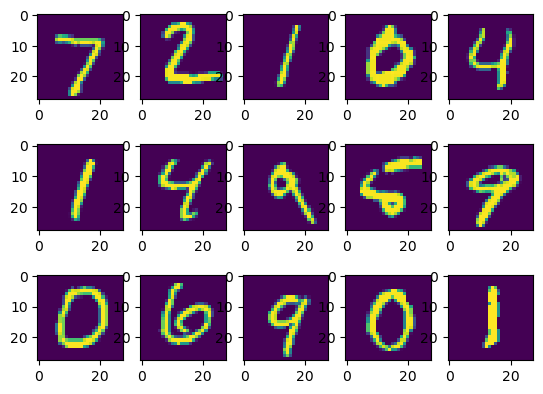

In [4]:
# Ploting 
example_iterator = iter(testset_dataloader)
example_data, example_targets = next(example_iterator)


for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(example_data[i][0])
plt.show()


In [5]:
# Hyper-parameters 
input_size = 784 # 28x28
num_classes = 10
num_epochs = 10
learning_rate = 0.001


In [6]:
# Fully connected neural network model
class NeuralNet(nn.Module):
    
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, num_classes)

    def forward(self, x):
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        out = F.relu(self.fc3(out))
        out = self.fc4(out)
        return out
    # No activation and no softmax at the end because we are going to use CrossEntropyLoss
    
model = NeuralNet(input_size, num_classes).to(device)


In [7]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  


In [8]:
# Train the model
n_total_steps = len(train_dataloader)

for epoch in range(num_epochs):
    
    for i, (images, labels) in enumerate(train_dataloader):
        
        # origin shape: [100, 1, 28, 28] , but model doesn't take it as input
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')


Epoch [1/10], Step [100/600], Loss: 0.5908
Epoch [1/10], Step [200/600], Loss: 0.3742
Epoch [1/10], Step [300/600], Loss: 0.3120
Epoch [1/10], Step [400/600], Loss: 0.2289
Epoch [1/10], Step [500/600], Loss: 0.2784
Epoch [1/10], Step [600/600], Loss: 0.3055
Epoch [2/10], Step [100/600], Loss: 0.1568
Epoch [2/10], Step [200/600], Loss: 0.1321
Epoch [2/10], Step [300/600], Loss: 0.1887
Epoch [2/10], Step [400/600], Loss: 0.1636
Epoch [2/10], Step [500/600], Loss: 0.2073
Epoch [2/10], Step [600/600], Loss: 0.1808
Epoch [3/10], Step [100/600], Loss: 0.1334
Epoch [3/10], Step [200/600], Loss: 0.1647
Epoch [3/10], Step [300/600], Loss: 0.2008
Epoch [3/10], Step [400/600], Loss: 0.0634
Epoch [3/10], Step [500/600], Loss: 0.1188
Epoch [3/10], Step [600/600], Loss: 0.0461
Epoch [4/10], Step [100/600], Loss: 0.0924
Epoch [4/10], Step [200/600], Loss: 0.1521
Epoch [4/10], Step [300/600], Loss: 0.1149
Epoch [4/10], Step [400/600], Loss: 0.1418
Epoch [4/10], Step [500/600], Loss: 0.0588
Epoch [4/10

In [9]:
# Test the model
with torch.no_grad():
    
    n_correct = 0
    n_samples = 0
    
    for images, labels in testset_dataloader:
        
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network : {acc} %')
    

Accuracy of the network : 97.09 %
